# Assignment 2

The goal of this assignment is to demonstrate that you are able to prepare a real-life dataset to analysis, perform machine learning experiments and thoroughly research the results. 

We've selected four datasets and assigned them randomly, see here (Links to an external site.)Links to an external site.:

Cancer: Predict cervical cancer using a set of demographic characteristics and medical tests.

Drugs: Predict drug consumption using a set of demographic characteristics and five personality measurements 

Students: Predict students grades (math and Portugal) using a set of demographic features. 

Grading: 

1. Read the description of the problem and identify your input and output variables. Load the data using pandas and split the data frame into X (inputs) and y (outputs). 2 points.
2. Prepare your dataset: encode categorical variables (if any), handle missing variables (if any), generate new features (if you have some intuition that these features can be useful). Preprocess target variable if needed (e.g., combine various classification problems into a single one or convert the target variable to a binary one.) For each transformation give a clear explanation of your motivation. 7 points.
3. Perform an exploratory analysis of the data via visualization with Seaborn. Try to find meaningful patterns in the data which can be used to make machine learning task more specific or to help with selection and tuning ML models. Perform additional preprocessing of your data if your findings suggest this (again, all steps should be motivated). If there are several options of target variables, you can select some of them after this step with a couple of sentences explaining your choice. 7 points.
4. Build a proper cross-validation procedure; select an appropriate measure of quality. Choose an ML model reasonably; look for a good set of hyperparameters. Use the prepared cross-validation procedure to estimate the quality of prediction. 9 points.
5. Analyze the obtained results (interesting findings, remarks on ML experiments, the applicability of the model in a real-life scenario) and make an overall conclusion. 5 points.

The solutions should be prepared as Jupyter notebooks.

# Cancer

**Source**:

Kelwin Fernandes (kafc _at_ inesctec _dot_ pt) - INESC TEC & FEUP, Porto, Portugal. 
Jaime S. Cardoso - INESC TEC & FEUP, Porto, Portugal. 
Jessica Fernandes - Universidad Central de Venezuela, Caracas, Venezuela.


**Data Set Information**:

The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela. The dataset comprises demographic information, habits, and historic medical records of 858 patients. Several patients decided not to answer some of the questions because of privacy concerns (missing values).


**Attribute Information**:

* (int) Age 
* (int) Number of sexual partners 
* (int) First sexual intercourse (age) 
* (int) Num of pregnancies 
* (bool) Smokes 
* (bool) Smokes (years) 
* (bool) Smokes (packs/year) 
* (bool) Hormonal Contraceptives 
* (int) Hormonal Contraceptives (years) 
* (bool) IUD 
* (int) IUD (years) 
* (bool) STDs 
* (int) STDs (number) 
* (bool) STDs:condylomatosis 
* (bool) STDs:cervical condylomatosis 
* (bool) STDs:vaginal condylomatosis 
* (bool) STDs:vulvo-perineal condylomatosis 
* (bool) STDs:syphilis 
* (bool) STDs:pelvic inflammatory disease 
* (bool) STDs:genital herpes 
* (bool) STDs:molluscum contagiosum 
* (bool) STDs:AIDS 
* (bool) STDs:HIV 
* (bool) STDs:Hepatitis B 
* (bool) STDs:HPV 
* (int) STDs: Number of diagnosis 
* (int) STDs: Time since first diagnosis 
* (int) STDs: Time since last diagnosis 
* (bool) Dx:Cancer 
* (bool) Dx:CIN 
* (bool) Dx:HPV 
* (bool) Dx 
* (bool) Hinselmann: target variable 
* (bool) Schiller: target variable 
* (bool) Cytology: target variable 
* (bool) Biopsy: target variable


**Relevant Papers**:

Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017.



**Citation Request**:

Kelwin Fernandes, Jaime S. Cardoso, and Jessica Fernandes. 'Transfer Learning with Partial Observability Applied to Cervical Cancer Screening.' Iberian Conference on Pattern Recognition and Image Analysis. Springer International Publishing, 2017.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn

## Problem definition (steps 1 and 2)
Cancer: Predict cervical cancer using a set of demographic characteristics and medical tests.

Let's assume this article https://www.cancer.net/cancer-types/cervical-cancer/diagnosis
Biopsy. A biopsy is the removal of a small amount of tissue for examination under a microscope. Other tests can suggest that cancer is present, but **only** a biopsy can make a **definite diagnosis**.

So the point of the attached work (this paper https://pdfs.semanticscholar.org/1c02/438ba4dfa775399ba414508e9cd335b69012.pdf) was like: "biopsy is not so convenient operation, so maybe we can do something less disturbing, use other features and then predict the result of the most accurate test event without doing it".

Also I found the discussion on Kaggle: https://www.kaggle.com/loveall/cervical-cancer-risk-classification/discussion/38317
One person suggested that cancer is Hinselmann+Schiller+Citology+Biopsy

According to these arguments I'll use **Biopsy** as the target column as it's the most accurate test for cervical cancer.

In [33]:
data = pd.read_csv('risk_factors_cervical_cancer.csv')
data.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [69]:
np.unique(data['Age'].values)

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
       30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 59, 70, 79, 84])

In [70]:
np.unique(data['Number of sexual partners'].values)

array(['1.0', '10.0', '15.0', '2.0', '28.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', '?'], dtype=object)

In [71]:
np.unique(data['First sexual intercourse'].values)

array(['10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0',
       '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0',
       '26.0', '27.0', '28.0', '29.0', '32.0', '?'], dtype=object)

In [72]:
np.unique(data['Num of pregnancies'].values)

array(['0.0', '1.0', '10.0', '11.0', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '?'], dtype=object)

In [73]:
np.unique(data['Smokes'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [74]:
np.unique(data['Smokes (years)'].values)

array(['0.0', '0.16', '0.5', '1.0', '1.266972909', '10.0', '11.0', '12.0',
       '13.0', '14.0', '15.0', '16.0', '18.0', '19.0', '2.0', '20.0',
       '21.0', '22.0', '24.0', '28.0', '3.0', '32.0', '34.0', '37.0',
       '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '?'], dtype=object)

### oh wow, 1.2696972909 in Smokes (years), very nice data
It actually could be something like 1 year + x/12, but...

Here https://pdfs.semanticscholar.org/1c02/438ba4dfa775399ba414508e9cd335b69012.pdf they also consider this field as an integer field


Interesting that this value occurs not only one time. And also there are exist values like 0.16 and 0.5. So let's just consider this field as float16

In [75]:
np.unique(data['Smokes (packs/year)'].values)

array(['0.0', '0.001', '0.003', '0.025', '0.04', '0.05', '0.1', '0.15',
       '0.16', '0.2', '0.25', '0.3', '0.32', '0.37', '0.4', '0.45', '0.5',
       '0.5132021277', '0.7', '0.75', '0.8', '0.9', '1.0', '1.2', '1.25',
       '1.3', '1.35', '1.4', '1.6', '1.65', '12.0', '15.0', '19.0', '2.0',
       '2.1', '2.2', '2.25', '2.4', '2.5', '2.6', '2.7', '2.75', '2.8',
       '21.0', '22.0', '3.0', '3.3', '3.4', '3.5', '37.0', '4.0', '4.5',
       '4.8', '5.0', '5.5', '5.7', '6.0', '7.0', '7.5', '7.6', '8.0',
       '9.0', '?'], dtype=object)

In [76]:
np.unique(data['Hormonal Contraceptives'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [27]:
np.unique(data['Hormonal Contraceptives (years)'].values)

array([ 0.        ,  0.08      ,  0.16      ,  0.17      ,  0.25      ,
        0.33      ,  0.41      ,  0.42      ,  0.5       ,  0.58      ,
        0.66      ,  0.67      ,  0.75      ,  1.        ,  1.5       ,
        2.        ,  2.28220052,  2.5       ,  3.        ,  3.5       ,
        4.        ,  4.5       ,  5.        ,  6.        ,  6.5       ,
        7.        ,  8.        ,  9.        , 10.        , 11.        ,
       12.        , 13.        , 14.        , 15.        , 16.        ,
       17.        , 19.        , 20.        , 22.        , 30.        ,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [77]:
np.unique(data['IUD'].values) # Intrauterine_device used or not

array(['0.0', '1.0', '?'], dtype=object)

In [78]:
np.unique(data['IUD (years)'].values) # For how many years

array(['0.0', '0.08', '0.16', '0.17', '0.25', '0.33', '0.41', '0.5',
       '0.58', '0.91', '1.0', '1.5', '10.0', '11.0', '12.0', '15.0',
       '17.0', '19.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', '?'], dtype=object)

In [79]:
np.unique(data['STDs'].values) # https://medical-dictionary.thefreedictionary.com/STD STD -- sexually transmitted disease

array(['0.0', '1.0', '?'], dtype=object)

In [42]:
np.unique(data['STDs (number)'].values)

array(['0.0', '1.0', '2.0', '3.0', '4.0', '?'], dtype=object)

In [43]:
np.unique(data['STDs:condylomatosis'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [44]:
np.unique(data['STDs:cervical condylomatosis'].values)

array(['0.0', '?'], dtype=object)

In [45]:
np.unique(data['STDs:vaginal condylomatosis'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [46]:
np.unique(data['STDs:vulvo-perineal condylomatosis'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [49]:
np.unique(data['STDs:pelvic inflammatory disease'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [48]:
np.unique(data['STDs:syphilis'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [50]:
np.unique(data['STDs:genital herpes'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [51]:
np.unique(data['STDs:molluscum contagiosum'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [52]:
np.unique(data['STDs:AIDS'].values)

array(['0.0', '?'], dtype=object)

In [53]:
np.unique(data['STDs:HIV'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [54]:
np.unique(data['STDs:Hepatitis B'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [55]:
np.unique(data['STDs:HPV'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [40]:
np.unique(data['STDs'].values)

array(['0.0', '1.0', '?'], dtype=object)

In [56]:
 np.unique(data['STDs: Number of diagnosis'].values)

array([0, 1, 2, 3])

In [57]:
np.unique(data['STDs: Time since first diagnosis'].values)

array(['1.0', '10.0', '11.0', '12.0', '15.0', '16.0', '18.0', '19.0',
       '2.0', '21.0', '22.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', '?'], dtype=object)

In [58]:
np.unique(data['STDs: Time since last diagnosis'].values)

array(['1.0', '10.0', '11.0', '12.0', '15.0', '16.0', '18.0', '19.0',
       '2.0', '21.0', '22.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', '?'], dtype=object)

In [59]:
np.unique(data['Dx:Cancer'].values) 
# Oncotype DX test for breast cancer https://www.breastcancer.org/symptoms/testing/types/oncotype_dx
# or maybe
# https://www.kaggle.com/loveall/cervical-cancer-risk-classification/discussion/38317
# person had previous cervical cancer diagnostic

array([0, 1])

In [60]:
np.unique(data['Dx:CIN'].values)
# https://www.kaggle.com/loveall/cervical-cancer-risk-classification/discussion/38317
# person had previous diagnostic of Cervical intraepithelial neoplasia

array([0, 1])

In [61]:
np.unique(data['Dx'].values) 
# it seems like it reperesents "if any disease was shown by Dx test", but according to data it's not true...

array([0, 1])

In [62]:
np.unique(data['Hinselmann'].values) # Hinselmann test

array([0, 1])

In [64]:
np.unique(data['Schiller'].values) # Shiller test

array([0, 1])

In [65]:
np.unique(data['Citology'].values) # Citology test

array([0, 1])

In [68]:
np.unique(data['Biopsy'].values) # Biopsy test

array([0, 1])

In [27]:
data.memory_usage(deep=True)

Index                                    80
Age                                    6864
Number of sexual partners             51639
First sexual intercourse              69393
Num of pregnancies                    51818
Smokes                                51558
Smokes (years)                        51722
Smokes (packs/year)                   51757
Hormonal Contraceptives               52128
Hormonal Contraceptives (years)       52304
IUD                                   52182
IUD (years)                           52199
STDs                                  52110
STDs (number)                         52110
STDs:condylomatosis                   52110
STDs:cervical condylomatosis          52110
STDs:vaginal condylomatosis           52110
STDs:vulvo-perineal condylomatosis    52110
STDs:syphilis                         52110
STDs:pelvic inflammatory disease      52110
STDs:genital herpes                   52110
STDs:molluscum contagiosum            52110
STDs:AIDS                       

In [28]:
data.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

Let's transform our dataframe types to consume less memory and to avoid types transforms for charts.

In [107]:
dt = np.dtype(list(zip(
            ['Age', 
             'Number of sexual partners', # https://i.ytimg.com/vi/qgXE91CzmJQ/hqdefault.jpg
             'First sexual intercourse', 
             'Num of pregnancies',
             'Smokes',
             'Smokes (years)',
             'Smokes (packs/year)', 
             'Hormonal Contraceptives', 
             'Hormonal Contraceptives (years)',
             'IUD',
             'IUD (years)',
             'STDs',
             'STDs (number)',
             'STDs:condylomatosis', 
             'STDs:cervical condylomatosis',
             'STDs:vaginal condylomatosis',
             'STDs:vulvo-perineal condylomatosis',
             'STDs:syphilis',
             'STDs:pelvic inflammatory disease',
             'STDs:genital herpes', 
             'STDs:molluscum contagiosum',
             'STDs:AIDS',
             'STDs:HIV',
             'STDs:Hepatitis B',
             'STDs:HPV', 
             'STDs: Number of diagnosis',
             'STDs: Time since first diagnosis',
             'STDs: Time since last diagnosis', 
             'Dx:Cancer',
             'Dx:CIN', 
             'Dx:HPV ',
             'Dx', 
             'Hinselmann',
             'Schiller ',
             'Citology',
             'Biopsy'],
            [np.int8, 
             np.int8,
             np.int8, 
             np.int8,
             np.bool,
             np.float16,
             np.float16,
             np.bool,
             np.int8,
             np.bool,
             np.int8,
             np.bool,
             np.int8,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.int8,
             np.int8,
             np.int8,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,
             np.bool,])))

In [2]:
data = pd.read_csv('removed_.0_1.csv', delimiter=',') 
# for removed_0.1.csv I just made some transormation in vim. Thus pandas better understands types

In [3]:
data.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [111]:
data.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [115]:
data.memory_usage(deep=True)

Index                                   80
Age                                   6864
Number of sexual partners             6864
First sexual intercourse              6864
Num of pregnancies                    6864
Smokes                                6864
Smokes (years)                        6864
Smokes (packs/year)                   6864
Hormonal Contraceptives               6864
Hormonal Contraceptives (years)       6864
IUD                                   6864
IUD (years)                           6864
STDs                                  6864
STDs (number)                         6864
STDs:condylomatosis                   6864
STDs:cervical condylomatosis          6864
STDs:vaginal condylomatosis           6864
STDs:vulvo-perineal condylomatosis    6864
STDs:syphilis                         6864
STDs:pelvic inflammatory disease      6864
STDs:genital herpes                   6864
STDs:molluscum contagiosum            6864
STDs:AIDS                             6864
STDs:HIV   

Let's transform nans at first.

I showed unique values earlier, for me it seems logical to set

1. 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' we'll set to very big value like 999. It seems logical because if the last or first diagnosis was a lot of years ago it's better to redo the diagnostics. I consider "Never" as a lot of years ago.

2. Other STDs remain or will be one-hot encoded to use models which don't work with nans


3. I'll set fields 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes (years)', 'Smokes (packs/year)', 'IUD (years)', 'Hormonal Contraceptives (years)' with distinct value like -1

4. 'Smokes', 'Hormonal Contraceptives', 'IUD' remain or will be one-hot encoded to use models which don't work with nans

In [3]:
# 1
data['STDs: Time since first diagnosis'].fillna(999, inplace=True)
data['STDs: Time since last diagnosis'].fillna(999, inplace=True)

#2
#3
data['Number of sexual partners'].fillna(-1, inplace=True)
data['First sexual intercourse'].fillna(-1, inplace=True)
data['Num of pregnancies'].fillna(-1, inplace=True)
data['Smokes (years)'].fillna(-1, inplace=True)
data['Smokes (packs/year)'].fillna(-1, inplace=True)
data['IUD (years)'].fillna(-1, inplace=True)
data['Hormonal Contraceptives (years)'].fillna(-1, inplace=True)


In [5]:
data.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999.0,999.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999.0,999.0,0,0,0,0,0,0,0,0
2,34,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999.0,999.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,999.0,999.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,999.0,999.0,0,0,0,0,0,0,0,0


## Visualization (step 3)

In [4]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pylab

Let's draw some pairplots with seaborn

In [105]:
# without this operation seaborn doesn't want to work...
def change_title(r):
    if r == 0:
        return 'No cancer'
    else:
        return 'Cancer'
data['Biopsy'] = data['Biopsy'].apply(lambda r: change_title(r))

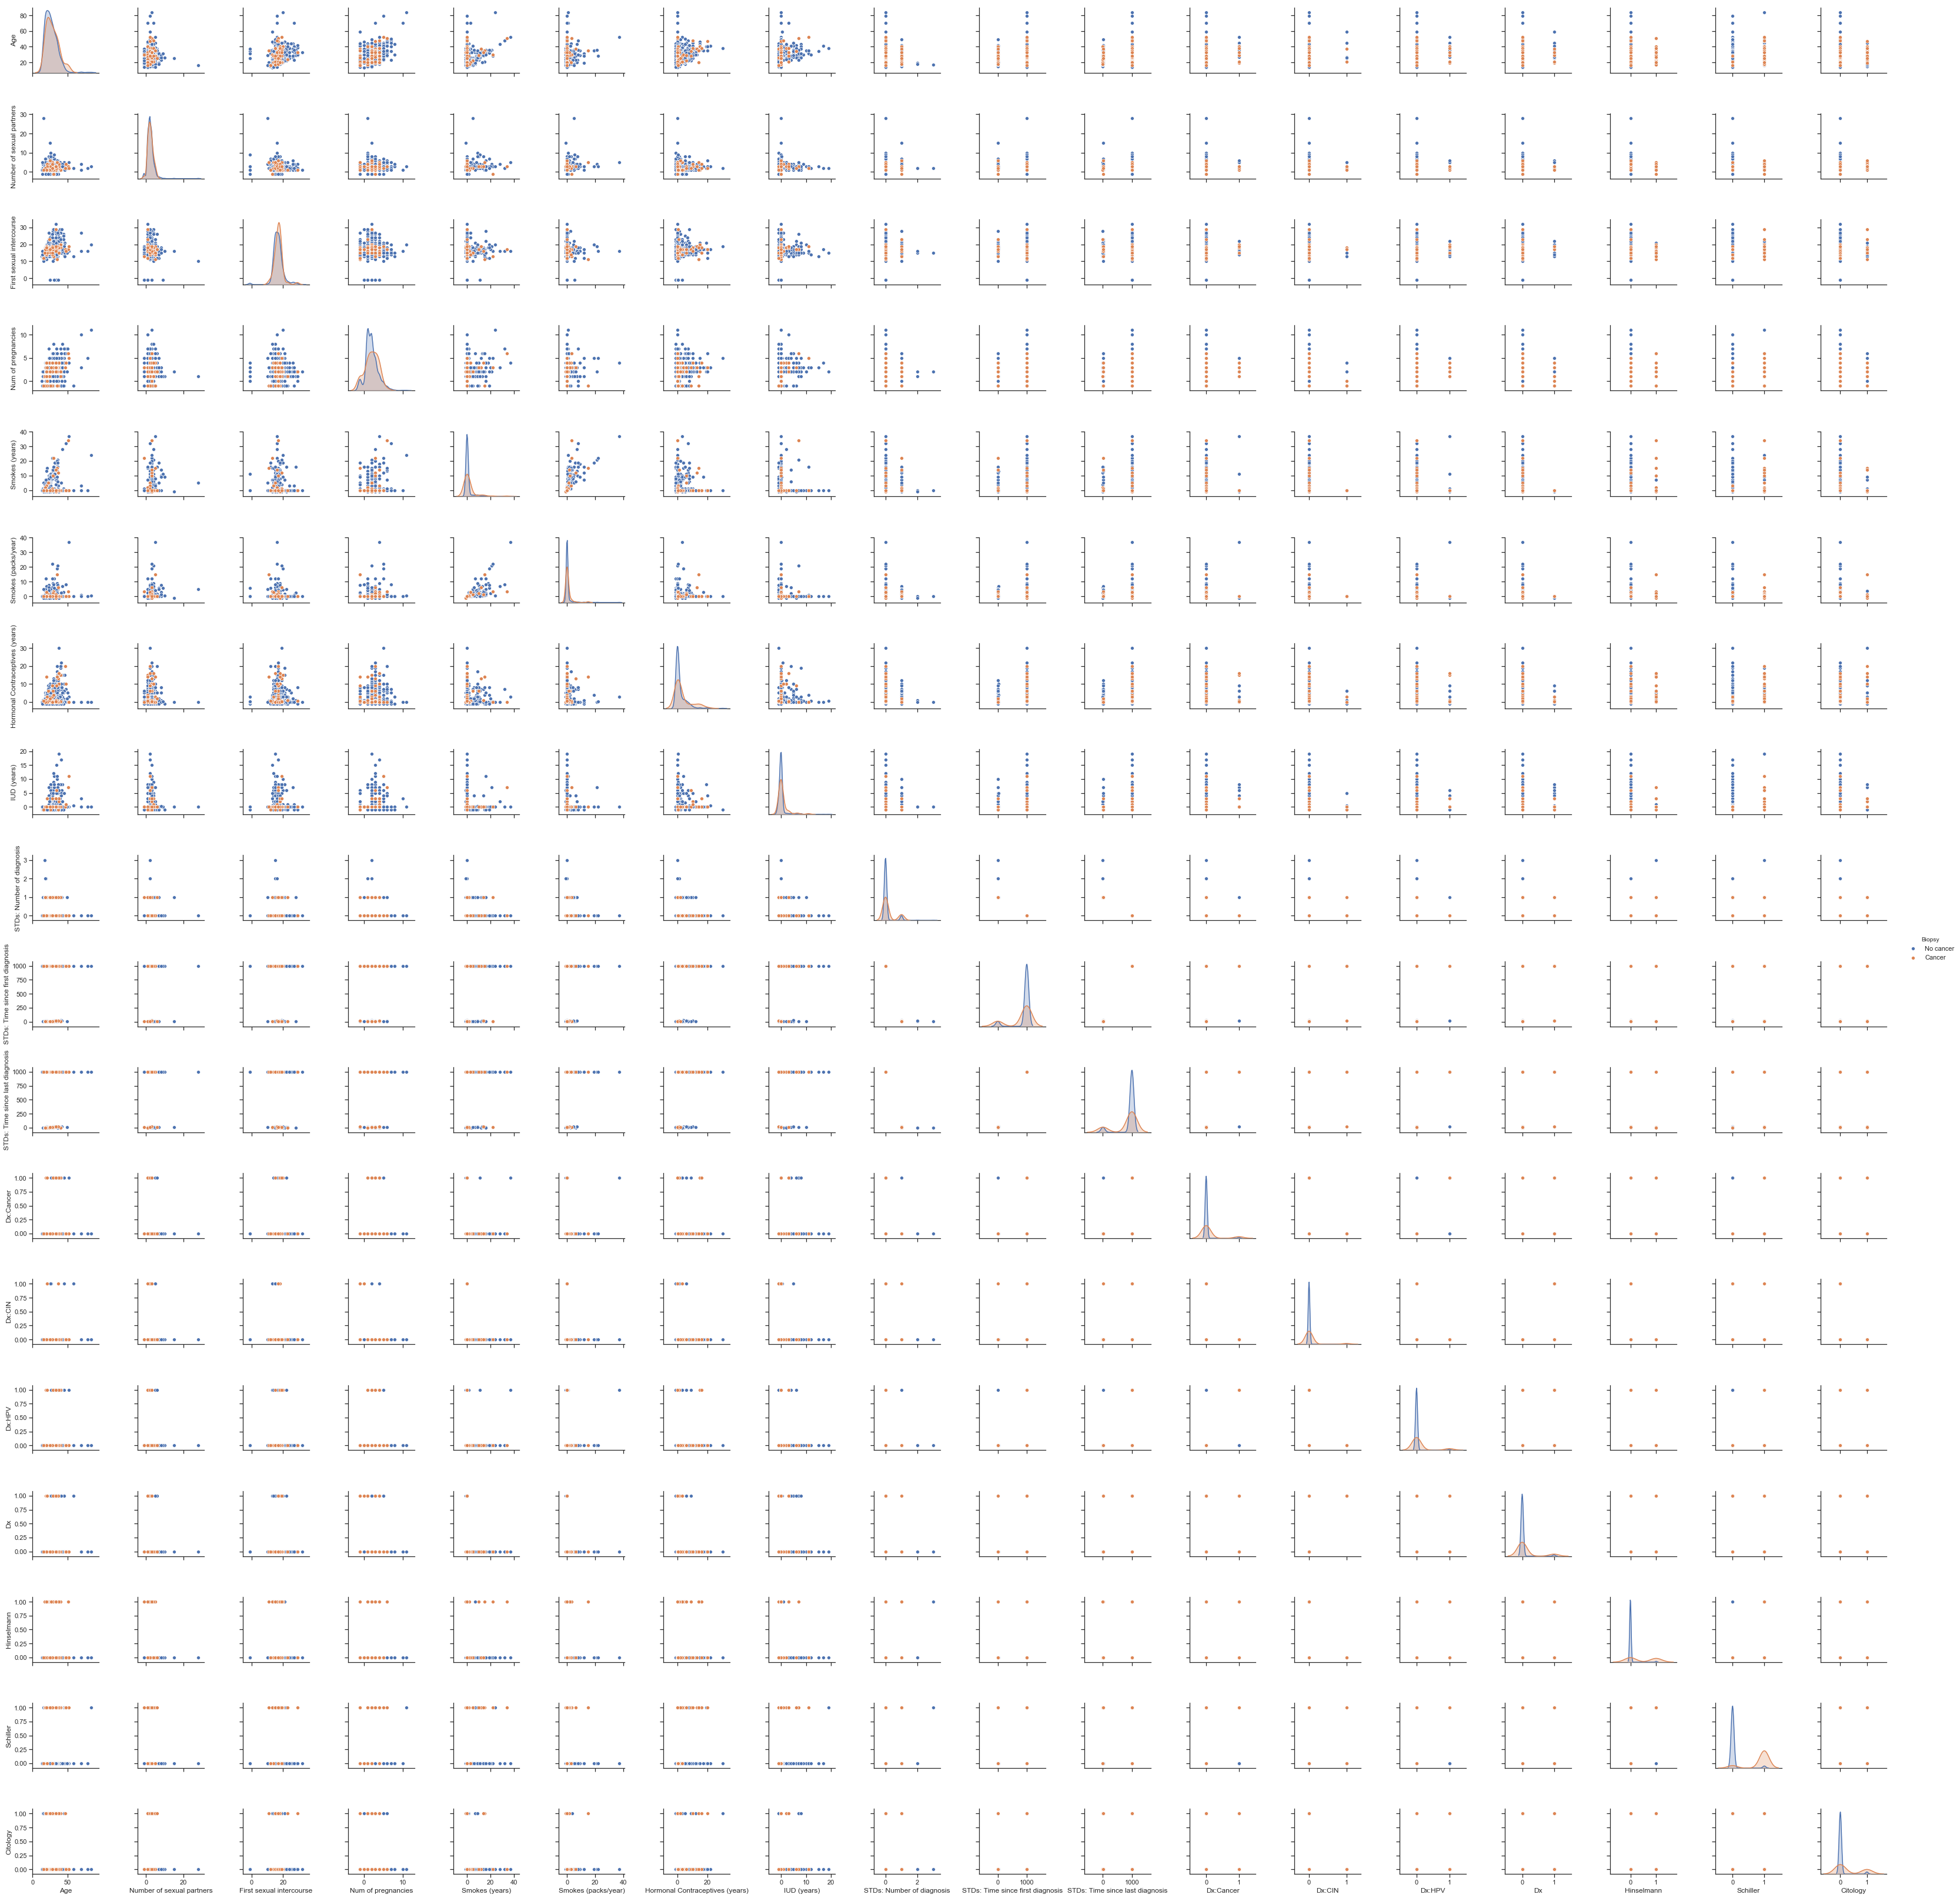

In [112]:
# let's remove features with nans
g = sns.pairplot(data.drop([
    'STDs', 
    'STDs (number)', 
    'STDs:condylomatosis', 
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV',
    'Smokes',
    'Hormonal Contraceptives',
    'IUD'
], axis=1), hue='Biopsy', dropna=True)
# you can further look on the picture by "copying the link" and pasting it to the browser url-field

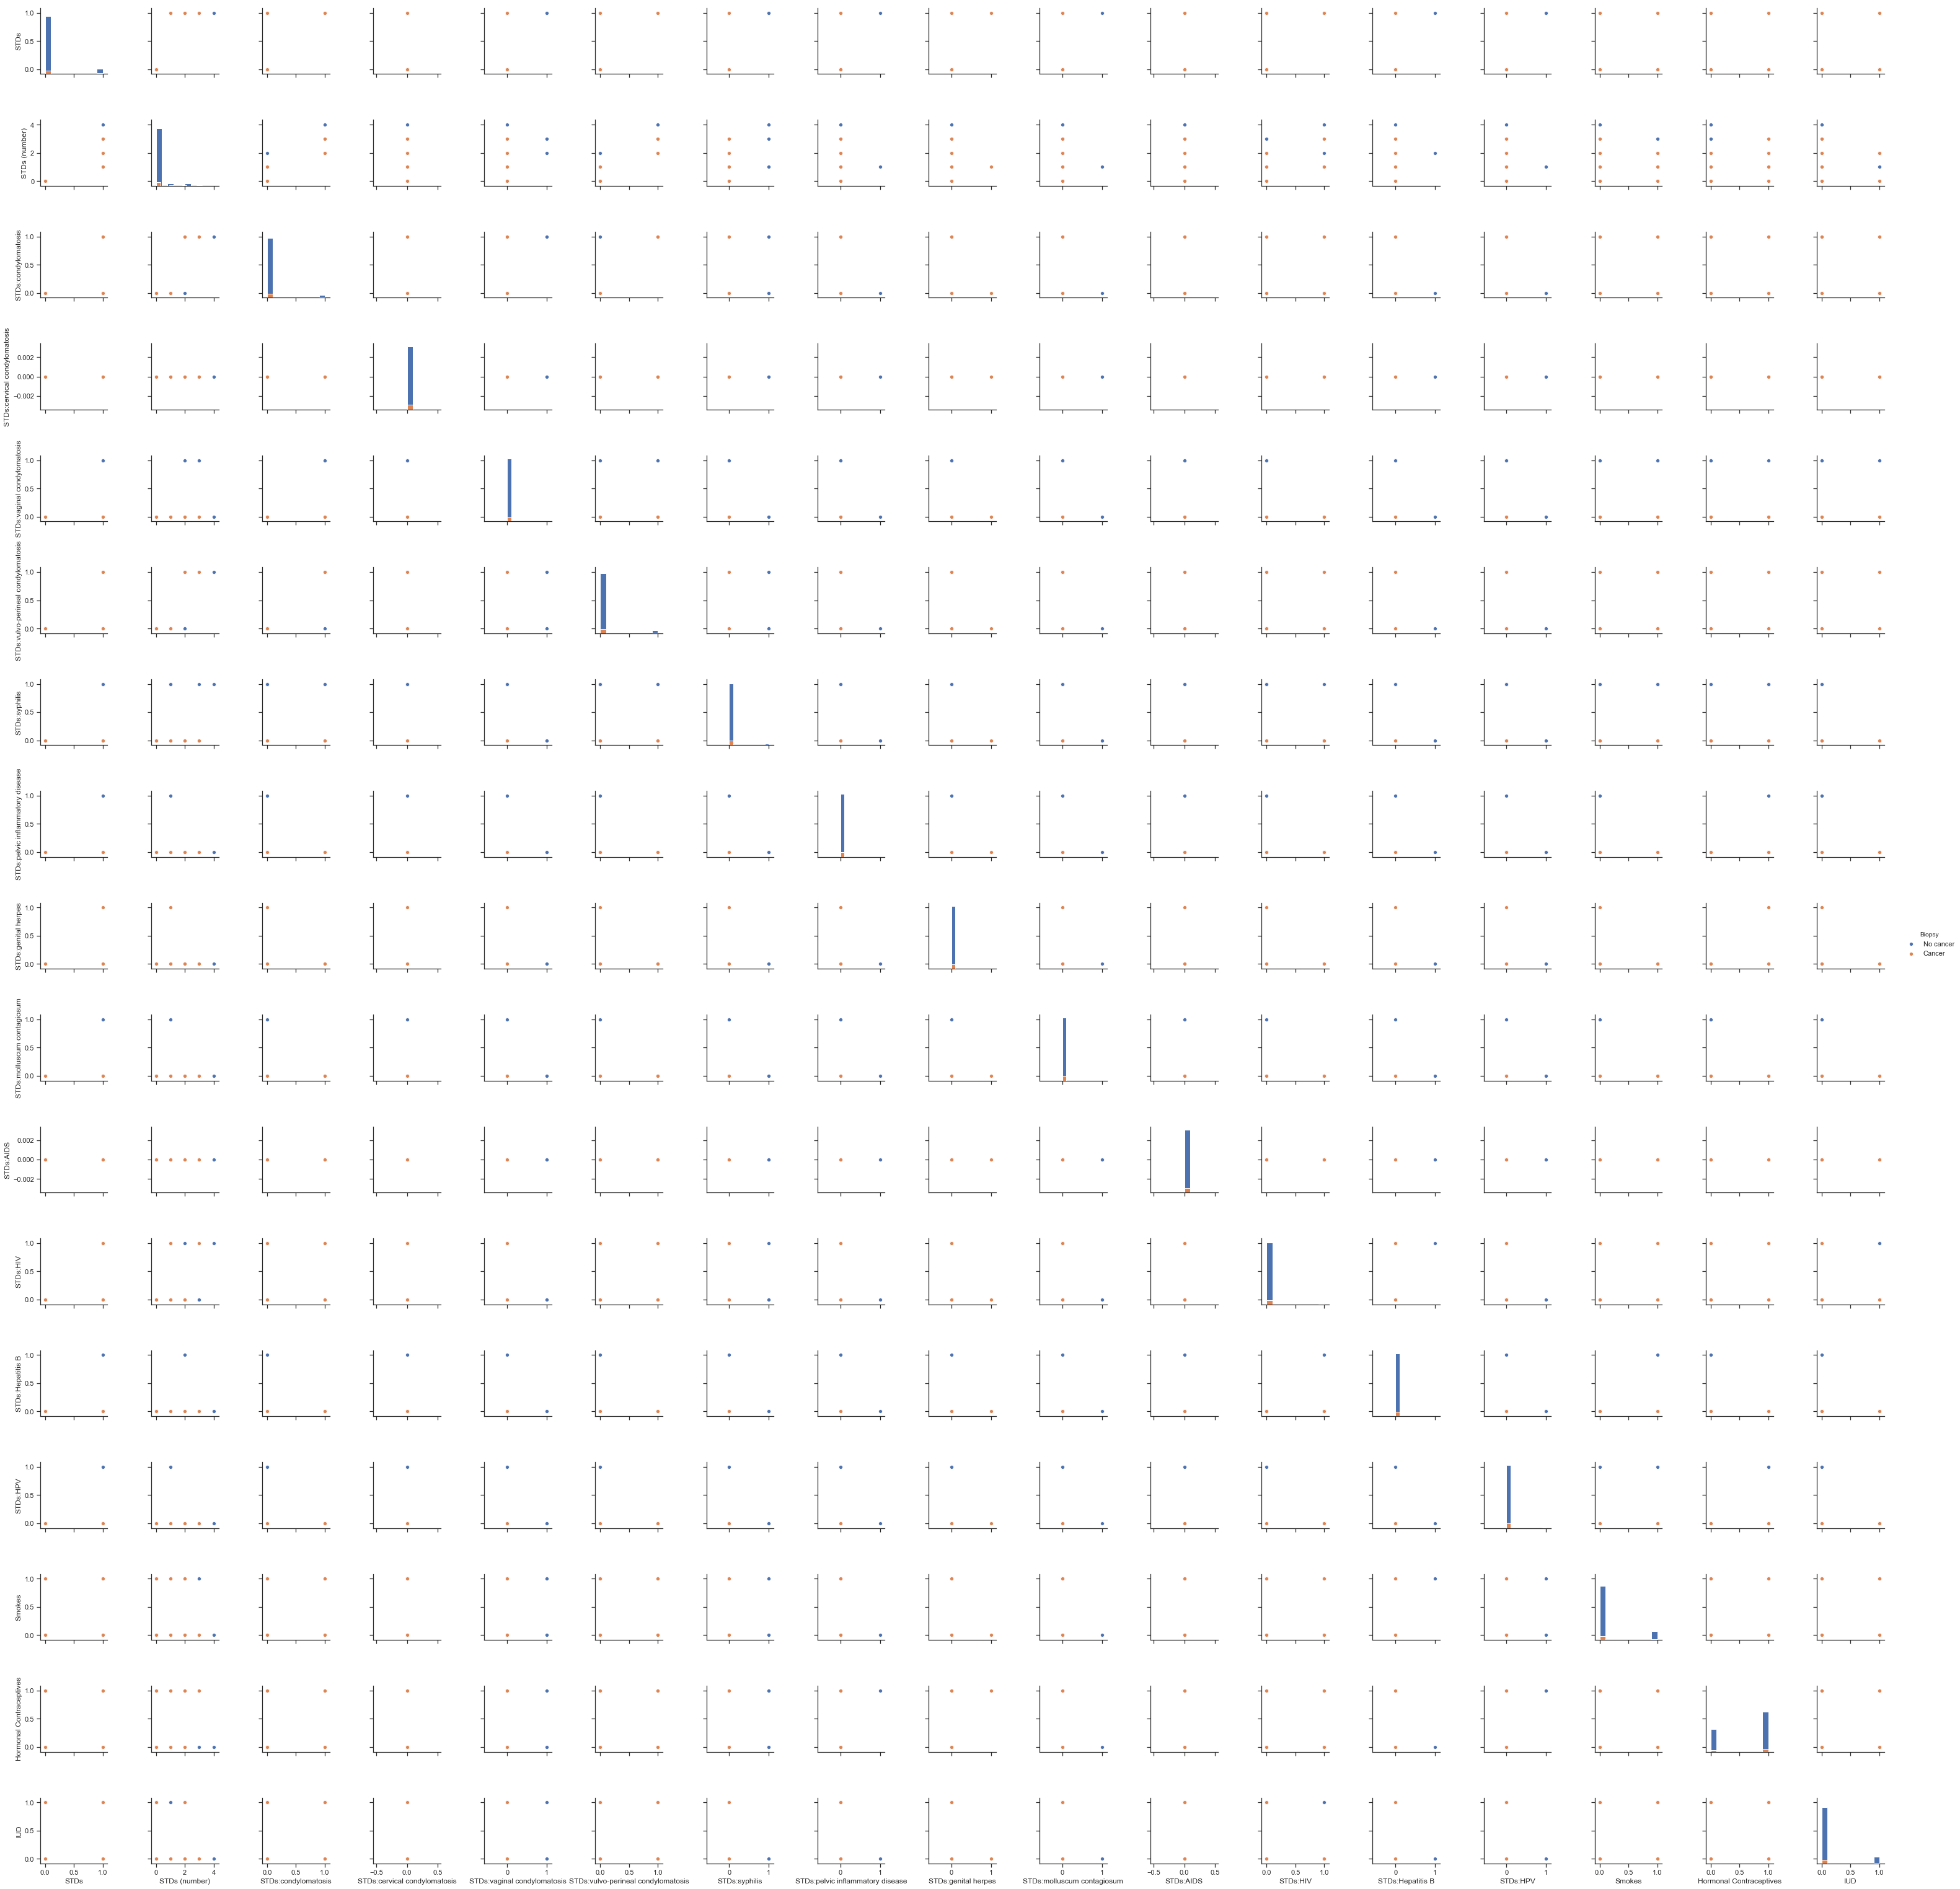

In [117]:
# now let's leave features with NaN
g = sns.pairplot(data[
    ['STDs', 
    'STDs (number)', 
    'STDs:condylomatosis', 
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV',
    'Smokes',
    'Hormonal Contraceptives',
    'IUD',
    'Biopsy']
].dropna(), hue='Biopsy', dropna=True, diag_kind='hist')

### So, what we can see now
1. Data is highly unbalanced (not surprizingly). There are way more "No cancer"s than "Cancer"s. Thanks God
2. There are a lot of pair plots where we can see complicated separating plane like circles (see "First sexual intercourse" and "Age" for instance). So, if we'll use method like logistic regression or SVM we must try to generate features like x^2, x*y etc (maybe after one-hot-encoding or just dropping nan having rows)
3. We can see that it's really hard to distinguish cancer. There is a big cluster where Hinselmann shows 1 but Shiller shows 0 and according to biopsy the person from this cluster doesn't have cancer.
4. Also we can see the results of NaN substitution within fields like "time since first diagnosis". Cancer group is concentrated on the top (999 value) within many pairs. For example see pairs like "time since first/last diagnosis" and "Hormonal contraceptives (years)".
5. It seems like cervical cancer doesn't like STDs: because if look on the pairs like "STDs:syphilis" and "Smokes" we can see strong bias for "No cancer" if person has syphilys. The same picture for "STDs: vaginal condylomatosis" (https://cloud.mail.ru/public/ALdw/DrAvvYybF)
6. There are some other pairs which share 1-5 findings

The last part I want to do before making models is to further check Shiller, Hinsellman, Citology pairs and also check the class balance again. Also it's a good idea to check which rows dissappear if I remove nans rows. If it's almost negative class, then I think it's ok to call dropna()

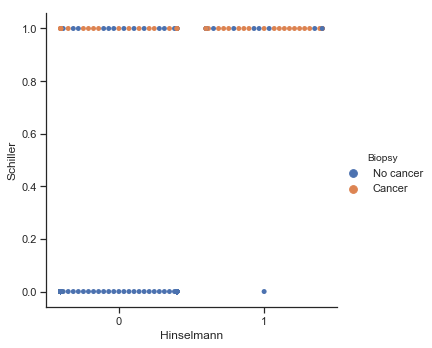

In [123]:
sns.catplot(x="Hinselmann", y="Schiller", hue="Biopsy", kind="swarm", data=data)

We can see here that if they both show the same result (especially for 0) than the chance of an error is smaller

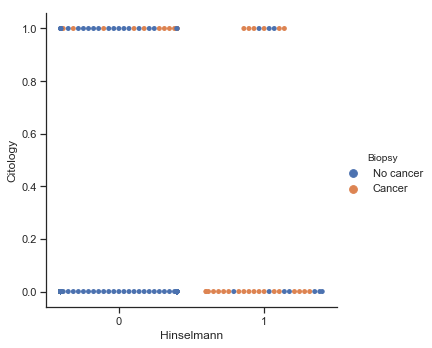

In [124]:
sns.catplot(x="Hinselmann", y="Citology", hue="Biopsy", kind="swarm", data=data)

It seems like Hinselmann is better than citology. Don't forget to check weights in the end.

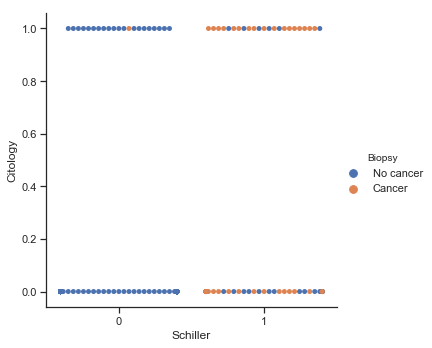

In [125]:
sns.catplot(x="Schiller", y="Citology", hue="Biopsy", kind="swarm", data=data)

Yeah, Citology is bad

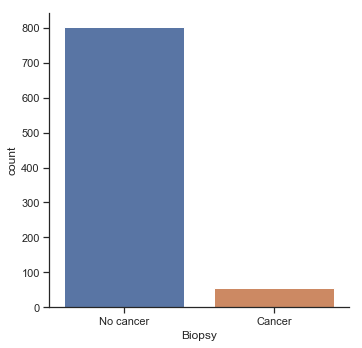

In [130]:
sns.catplot(x='Biopsy', y=None, kind="count", data=data)

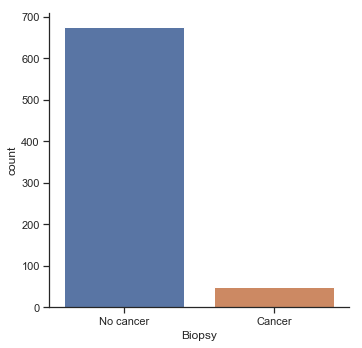

In [129]:
sns.catplot(x='Biopsy', y=None, kind="count", data=data.dropna())

In [132]:
print("Without dropping nan {} (No cancer)".format(data['Biopsy'][data['Biopsy']=='No cancer'].count()))
print("Without dropping nan {} (Cancer)".format(data['Biopsy'][data['Biopsy']=='Cancer'].count()))

print("Drop nan {} (No cancer)".format(data.dropna()['Biopsy'][data['Biopsy']=='No cancer'].count()))
print("Drop nan {} (Cancer)".format(data.dropna()['Biopsy'][data['Biopsy']=='Cancer'].count()))

Without dropping nan 803 (No cancer)
Without dropping nan 55 (Cancer)
Drop nan 676 (No cancer)
Drop nan 50 (Cancer)


So the balance didn't change so much

## Cross validation (point 4)

In [5]:
def change_title_back(r):
    if r == 'No cancer':
        return 0.0
    else:
        return 1.0
data['Biopsy'] = data['Biopsy'].apply(lambda r: change_title_back(r))

In [5]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [139]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'recall_macro', 'precision', 'accuracy', 'r2', 'f1_samples', 'roc_auc', 'recall_micro', 'recall_weighted', 'precision_samples', 'mutual_info_score', 'neg_mean_squared_log_error', 'average_precision', 'brier_score_loss', 'recall', 'f1_micro', 'recall_samples', 'neg_mean_squared_error', 'precision_macro', 'neg_log_loss', 'neg_median_absolute_error', 'homogeneity_score', 'f1', 'neg_mean_absolute_error', 'f1_weighted', 'balanced_accuracy', 'adjusted_mutual_info_score', 'precision_micro', 'v_measure_score', 'normalized_mutual_info_score', 'completeness_score', 'precision_weighted', 'f1_macro', 'adjusted_rand_score', 'fowlkes_mallows_score'])

I'll choose F1 metric as it's balanced between precision and recall. Also I don't have any prescriptions about precision -> max or recall -> max

In [38]:
X, y = dropna_data.drop('Biopsy', axis=1), dropna_data.Biopsy.astype(float)

# build a classifier
clf = RandomForestClassifier()


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


skf = StratifiedKFold(n_splits=3, shuffle=False)
            
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, 5, 7, None],
              "n_estimators": [20, 50, 100, 200],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=skf.split(X,y), scoring='f1')

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, 5, 7, None],
              "n_estimators": [20, 50, 100, 200],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=skf.split(X,y), scoring='f1')
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 14.67 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.578 (std: 0.086)
Parameters: {'max_depth': None, 'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.573 (std: 0.115)
Parameters: {'max_depth': 7, 'bootstrap': False, 'criterion': 'gini', 'n_estimators': 50}

Model with rank: 3
Mean validation score: 0.543 (std: 0.061)
Parameters: {'max_depth': None, 'bootstrap': False, 'criterion': 'gini', 'n_estimators': 100}

GridSearchCV took 19.23 seconds for 64 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.568 (std: 0.127)
Parameters: {'max_depth': None, 'criterion': 'gini', 'bootstrap': True, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.562 (std: 0.051)
Parameters: {'max_depth': None, 'criterion': 'entropy', 'bootstrap': False, 'n_estimators': 20}

Model with rank: 3
Mean validation score: 0.551 (std: 0.166)
Parameters: {'

Now let's do one-hot encoding

In [6]:
additional = data[
    ['STDs', 
    'STDs (number)', 
    'STDs:condylomatosis', 
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV',
    'Smokes',
    'Hormonal Contraceptives',
    'IUD']
].fillna(666)
additional['STDs'] = additional['STDs'].astype('category')
additional['STDs (number)'] = additional['STDs (number)'].astype('category')
additional['STDs:condylomatosis'] = additional['STDs:condylomatosis'].astype('category')
additional['STDs:cervical condylomatosis'] = additional['STDs:cervical condylomatosis'].astype('category')
additional['STDs:vaginal condylomatosis'] = additional['STDs:vaginal condylomatosis'].astype('category')
additional['STDs:vulvo-perineal condylomatosis'] = additional['STDs:vulvo-perineal condylomatosis'].astype('category')
additional['STDs:syphilis'] = additional['STDs:syphilis'].astype('category')
additional['STDs:pelvic inflammatory disease'] = additional['STDs:pelvic inflammatory disease'].astype('category')
additional['STDs:genital herpes'] = additional['STDs:genital herpes'].astype('category')
additional['STDs:molluscum contagiosum'] = additional['STDs:molluscum contagiosum'].astype('category')
additional['STDs:AIDS'] = additional['STDs:AIDS'].astype('category')
additional['STDs:HIV'] = additional['STDs:HIV'].astype('category')
additional['STDs:Hepatitis B'] = additional['STDs:Hepatitis B'].astype('category')
additional['STDs:HPV'] = additional['STDs:HPV'].astype('category')
additional['Smokes'] = additional['Smokes'].astype('category')
additional['Hormonal Contraceptives'] = additional['Hormonal Contraceptives'].astype('category')
additional['IUD'] = additional['IUD'].astype('category')

In [7]:
nan_cols = ['STDs', 
    'STDs (number)', 
    'STDs:condylomatosis', 
    'STDs:cervical condylomatosis',
    'STDs:vaginal condylomatosis',
    'STDs:vulvo-perineal condylomatosis',
    'STDs:syphilis',
    'STDs:pelvic inflammatory disease',
    'STDs:genital herpes',
    'STDs:molluscum contagiosum',
    'STDs:AIDS',
    'STDs:HIV',
    'STDs:Hepatitis B',
    'STDs:HPV',
    'Smokes',
    'Hormonal Contraceptives',
    'IUD']

In [8]:
additional.shape

(858, 17)

In [9]:
additional_dummied = pd.get_dummies(additional, prefix=['col:'+str(i) for i in range(17)])

In [10]:
additional_dummied.columns

Index(['col:0_0.0', 'col:0_1.0', 'col:0_666.0', 'col:1_0.0', 'col:1_1.0',
       'col:1_2.0', 'col:1_3.0', 'col:1_4.0', 'col:1_666.0', 'col:2_0.0',
       'col:2_1.0', 'col:2_666.0', 'col:3_0.0', 'col:3_666.0', 'col:4_0.0',
       'col:4_1.0', 'col:4_666.0', 'col:5_0.0', 'col:5_1.0', 'col:5_666.0',
       'col:6_0.0', 'col:6_1.0', 'col:6_666.0', 'col:7_0.0', 'col:7_1.0',
       'col:7_666.0', 'col:8_0.0', 'col:8_1.0', 'col:8_666.0', 'col:9_0.0',
       'col:9_1.0', 'col:9_666.0', 'col:10_0.0', 'col:10_666.0', 'col:11_0.0',
       'col:11_1.0', 'col:11_666.0', 'col:12_0.0', 'col:12_1.0',
       'col:12_666.0', 'col:13_0.0', 'col:13_1.0', 'col:13_666.0',
       'col:14_0.0', 'col:14_1.0', 'col:14_666.0', 'col:15_0.0', 'col:15_1.0',
       'col:15_666.0', 'col:16_0.0', 'col:16_1.0', 'col:16_666.0'],
      dtype='object')

In [11]:
additional_pure = additional_dummied

In [12]:
additional_pure.columns

Index(['col:0_0.0', 'col:0_1.0', 'col:0_666.0', 'col:1_0.0', 'col:1_1.0',
       'col:1_2.0', 'col:1_3.0', 'col:1_4.0', 'col:1_666.0', 'col:2_0.0',
       'col:2_1.0', 'col:2_666.0', 'col:3_0.0', 'col:3_666.0', 'col:4_0.0',
       'col:4_1.0', 'col:4_666.0', 'col:5_0.0', 'col:5_1.0', 'col:5_666.0',
       'col:6_0.0', 'col:6_1.0', 'col:6_666.0', 'col:7_0.0', 'col:7_1.0',
       'col:7_666.0', 'col:8_0.0', 'col:8_1.0', 'col:8_666.0', 'col:9_0.0',
       'col:9_1.0', 'col:9_666.0', 'col:10_0.0', 'col:10_666.0', 'col:11_0.0',
       'col:11_1.0', 'col:11_666.0', 'col:12_0.0', 'col:12_1.0',
       'col:12_666.0', 'col:13_0.0', 'col:13_1.0', 'col:13_666.0',
       'col:14_0.0', 'col:14_1.0', 'col:14_666.0', 'col:15_0.0', 'col:15_1.0',
       'col:15_666.0', 'col:16_0.0', 'col:16_1.0', 'col:16_666.0'],
      dtype='object')

In [13]:
data_pure_ohe = pd.concat([data.drop(nan_cols, axis=1), additional_pure], axis=1)

In [22]:
data_pure_ohe.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs: Number of diagnosis,STDs: Time since first diagnosis,...,col:13_666.0,col:14_0.0,col:14_1.0,col:14_666.0,col:15_0.0,col:15_1.0,col:15_666.0,col:16_0.0,col:16_1.0,col:16_666.0
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0,999.0,...,0,1,0,0,1,0,0,1,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0,999.0,...,0,1,0,0,1,0,0,1,0,0
2,34,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0,999.0,...,0,1,0,0,1,0,0,1,0,0
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0,999.0,...,0,0,1,0,0,1,0,1,0,0
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0,999.0,...,0,1,0,0,0,1,0,1,0,0


Let's perform the same operation as earlier

In [36]:
X, y = data_pure_ohe.drop('Biopsy', axis=1), data_pure_ohe.Biopsy

# build a classifier
clf = RandomForestClassifier()


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


skf = StratifiedKFold(n_splits=3, shuffle=False)
            
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, 5, 7, None],
              "n_estimators": [20, 50, 100, 200],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=skf.split(X,y), scoring='f1')

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, 5, 7, None],
              "n_estimators": [20, 50, 100, 200],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=skf.split(X,y), scoring='f1')
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 16.05 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.561 (std: 0.038)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 50, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.543 (std: 0.078)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 50, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.521 (std: 0.065)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 200, 'max_depth': None}

GridSearchCV took 19.22 seconds for 64 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.580 (std: 0.093)
Parameters: {'bootstrap': True, 'max_depth': None, 'n_estimators': 50, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.567 (std: 0.038)
Parameters: {'bootstrap': False, 'max_depth': None, 'n_estimators': 100, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.537 (std: 0.078)
Paramet

The result is not so different. Let's try our last hypothesis to generate x^2, xy... features. For this we'll apply SVM model.

In [37]:
#old_cols = data_pure_ohe.columns
#idx = 0
#for elem in old_cols:
#    for inner in old_cols:
#        data_pure_ohe['m'+str(idx)] = data_pure_ohe[elem].multiply(data_pure_ohe[inner])
#        idx+=1

In [38]:
#data_pure_ohe.head(5)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs: Number of diagnosis,STDs: Time since first diagnosis,...,m5031,m5032,m5033,m5034,m5035,m5036,m5037,m5038,m5039,m5040
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0,999.0,...,0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0,999.0,...,0,0,0,0,0,0,0,0,0,0
2,34,1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0,999.0,...,0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,37.0,37.0,3.0,0.0,0,999.0,...,0,0,0,0,0,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,15.0,0.0,0,999.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.svm import SVC

In [17]:
X, y = data_pure_ohe.drop('Biopsy', axis=1), data_pure_ohe.Biopsy

# build a classifier
clf = SVC(max_iter=1e6)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


skf = StratifiedKFold(n_splits=3, shuffle=False)
            
# specify parameters and distributions to sample from
param_dist = {"C": [1.0, 2.0, 3.0],
              "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
              "degree": [1,2,3,4],
              "shrinking": [True, False],
              "decision_function_shape": ['ovo', 'ovr']}

# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=skf.split(X,y), scoring='f1')

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"C": [1.0, 2.0, 3.0],
              "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
              "degree": [1,2,3,4],
              "shrinking": [True, False],
              "decision_function_shape": ['ovo', 'ovr']}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=skf.split(X,y), scoring='f1')
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

RandomizedSearchCV took 41.61 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.705 (std: 0.032)
Parameters: {'shrinking': False, 'degree': 4, 'decision_function_shape': 'ovo', 'C': 1.0, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.705 (std: 0.032)
Parameters: {'shrinking': False, 'degree': 3, 'decision_function_shape': 'ovr', 'C': 1.0, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.705 (std: 0.032)
Parameters: {'shrinking': True, 'degree': 4, 'decision_function_shape': 'ovo', 'C': 1.0, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.705 (std: 0.032)
Parameters: {'shrinking': False, 'degree': 2, 'decision_function_shape': 'ovo', 'C': 1.0, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.705 (std: 0.032)
Parameters: {'shrinking': True, 'degree': 2, 'decision_function_shape': 'ovr', 'C': 1.0, 'kernel': 'linear'}

Model with rank: 1
Mean validation score: 0.705 (std: 0.032)
Param

So we can see that SVM worked way more better (without poly kernel though but...ok)

## Conclusion
So we can see that some hypothesis worked and some of them not. 
I tried various methods to solve the task.
In the beginning I said how it can be used, but I'll repeat it again here.

The main point of this work:
Biopsy is the most accurate but also the most difficult test. So, using this model people don't need to have biopsy test, only to answer on some questions and make some easier tests. 